# 1.Préparation et exploration des données
## Charger et prétraiter les images 


tf version : 2.20.0
Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.
Class Names : ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


Data is loaded, normalized & optimized


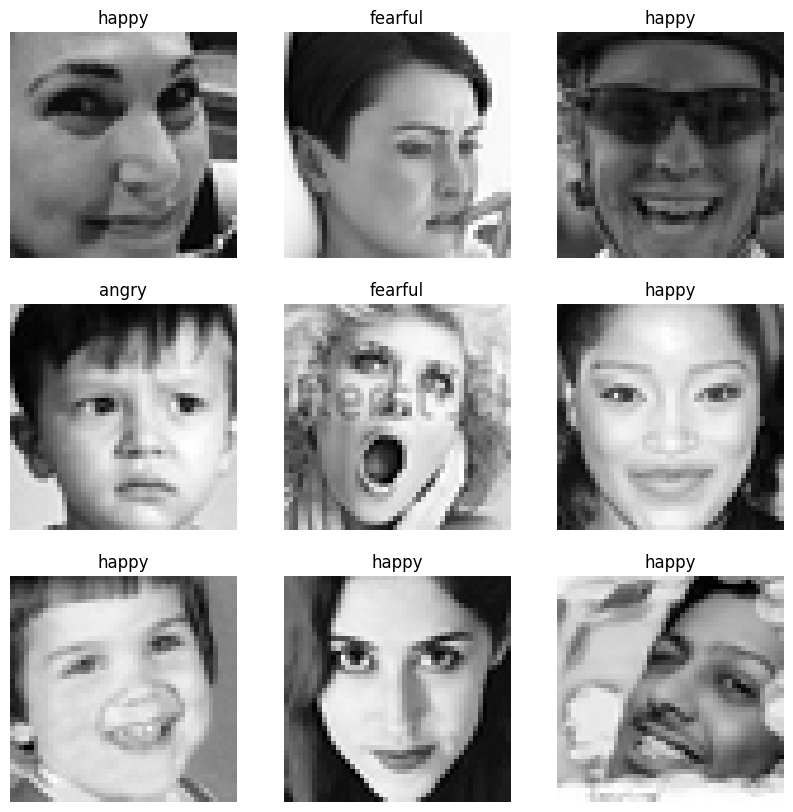

c:\Users\ezzya\OneDrive\Desktop\Simplon Maghreb\Briefs\D-tection-d-motions-Faciales---CNN-Haar-Cascade-\CNN2ENV\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,527 (2.61 MB)

 Trainable params: 683,527 (2.61 MB)

 Non-trainable params: 0 (0.00 B)


 Lancement de l'entrainement...
Epoch 1/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 58s 61ms/step - accuracy: 0.2480 - loss: 1.8241 - val_accuracy: 0.2471 - val_loss: 1.8143
Epoch 2/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 55ms/step - accuracy: 0.2512 - loss: 1.8155 - val_accuracy: 0.2471 - val_loss: 1.8164
Epoch 3/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.2513 - loss: 1.8134 - val_accuracy: 0.2471 - val_loss: 1.8140
Epoch 4/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 44s 48ms/step - accuracy: 0.2513 - loss: 1.8127 - val_accuracy: 0.2471 - val_loss: 1.8133
Epoch 5/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 55ms/step - accuracy: 0.2513 - loss: 1.8119 - val_accuracy: 0.2471 - val_loss: 1.8132
Epoch 6/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.2513 - loss: 1.8117 - val_accuracy: 0.2471 - val_loss: 1.8132

 Entrainement terminé
Model sauvegradé sous 'my_model_emotion_detection.keras'


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt 
import os

print(f"tf version : {tf.__version__}")

# Def : Chemins & Parametres --> r\ pour que Windows gere bien les "\"
# --------------------------------------------------------------------
data_dir = r"C:\Users\ezzya\OneDrive\Desktop\Simplon Maghreb\Briefs\D-tection-d-motions-Faciales---CNN-Haar-Cascade-\Data_Kaggle_Emotional_Detection"
train_data = data_dir + r"\train"       # Sur Colab, après avoir décompressé 'data.zip' : DATA_DIR = "/content/data"
test_data = data_dir + r"\test"

# Datasets Parameters
BATCH_SIZE = 32     # Valeurs typiques 16, 32, 64, 128
IMG_HEIGHT = 48     #images du DATASET: 48 * 48
IMG_WIDTH = 48
NUM_CLASSES = 7     # (angry, disgust, fear, happy, neutral, sad, surprise)
AUTOTUNE = tf.data.AUTOTUNE     # optimiser le chargement

# loading data 
# ------------
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_data,
    label_mode = 'int',      # labels : int (0,1,2,...) ------
    color_mode = 'grayscale',
    image_size = (IMG_HEIGHT,IMG_WIDTH),
    batch_size = BATCH_SIZE
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_data,
    label_mode = 'int',
    color_mode = 'grayscale',
    image_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE
)

class_names = train_dataset.class_names
print(f"Class Names : {class_names}")


# Pretraitement & Optimisation
# ----------------------------

# Normalisation
normalized_layer = layers.Rescaling(1./255)     # Couche Keras :  [0,255] --> [0,1]

# Normalisation ---> train/test Datasets
train_dataset = train_dataset.map(lambda x, y : (normalized_layer(x),y))
test_dataset = test_dataset.map(lambda x, y: (normalized_layer(x),y))

# Optimiser les performances
# cache() : garde les donnees en memoire
# prefetch() : pré-charge les lots  de donnees 
train_dataset = train_dataset.cache().prefetch(buffer_size = AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size = AUTOTUNE)

print("\n")
print("Data is loaded, normalized & optimized")

# Verfi fonctionnement  - lot d'images : 
plt.figure(figsize=(10,10))
for images, labels in train_dataset.take(1):    #seul batch
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().reshape(48,48), cmap = 'gray')
        plt.title(class_names[labels[i]])
        plt.axis("off")
        
plt.show()
# -------------- phase d'Entrainement ----------------
# ---- Creation modele CNN  ( --- API Sequentiel --- )
    # Etape I : Couche Entree / Pretraitement
    # input_shape doit être (48, 48, 1) car les images sont en niveaux de gris (1 canal)

model = tf.keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),

    # Etape II : 1er bloc de convultion
    # Conv2D : 32 filtres, taille 3x3, RELU
    layers.Conv2D(32,(3,3), activation = 'relu', padding = 'same'),
    # MaxPooling : Reduire la taille d'image (max 2x2)
    layers.MaxPooling2D((2,2)),

    # Etape III : 2e bloc de Conv
    # doubler les filtres --> plus de details
    layers.Conv2D(64,(3,3), activation ='relu', padding = 'same'),
    layers.MaxPooling2D((2,2)),

    # Etape IV : 3e bloc de Conv
    layers.Conv2D(128,(3,3), activation ='relu', padding ='same'),
    layers.MaxPooling2D((2,2)),

    # Etape V : Aplatir (Flatten)
    # Cube de data --> vecteur 1D
    layers.Flatten(), 

    # Etape VI : Couche "Dense" (Classique)
    # 128 neurones pour apprendre les combinaisons
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.5),    # 50% eteints à chaque etape pour eviter overfitting

    # Etape VII : Couche de sortie
    # 7 neurones :  1 neurone --> 1 emotion
    
    layers.Dense(NUM_CLASSES, activation = 'softmax')   # 'softmax' : som (predictions) = 1 (probabilités)
])

# --- Compilation du modèle : comment le modele va apprendre
model.compile(
    optimizer = 'adam',     # meilleur opt par defaut
    loss = 'sparse_categorical_crossentropy',   #fct de cout : class -----
    metrics = ['accuracy'],  # taux de bonne  predictions
)
 # resume de l 'architecture
model.summary()

# --- Entrainement du model - final step
print("\n Lancement de l'entrainement...")

# Arreter
early_stop = EarlyStopping(
    monitor = 'val_accuracy',   # ce qu'on surveille
    patience = 5,               # epoques à attendre
    restore_best_weights = True
)
EPOCHS = 25      # epochs : le nombre de "passages" sur le dataset, Commencez avec n pour tester, puis augmentez

history = model.fit(
    train_dataset,
    validation_data = test_dataset,
    epochs = EPOCHS,
    callbacks = [early_stop]
)
print("\n Entrainement terminé")
model.save("my_model_emotion_detection.keras")
print("Model sauvegradé sous 'my_model_emotion_detection.keras'")


--------------------------------------------------------------------------------------------------------------
Classes trouvées : [***'angry'***, ***'disgust'***, ***'fear'***, ***'happy'***, ***'neutral'***, ***'sad'***, ***'surprise'***]

* --- Statistiques des Classes (Train) ---
    * Classe **'angry'**: 3995 images
    * Classe **'disgust'**: 436 images
    * Classe **'fear'**: 4097 images
    * Classe **'happy'**: 7215 images
    * Classe **'neutral'**: 4965 images
    * Classe **'sad'**: 4830 images
    * Classe **'surprise'**: 3171 images
        * **Total**: 28709 images

# 2. Entrainement du CNN

In [ ]:

"""import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt 
import os

# Def : Chemins & Parametres --> r\ pour que Windows gere bien les "\"
# --------------------------------------------------------------------
data_dir = r"C:\Users\ezzya\OneDrive\Desktop\Simplon Maghreb\Briefs\D-tection-d-motions-Faciales---CNN-Haar-Cascade-\Data_Kaggle_Emotional_Detection"
train_data = data_dir + r"\train"       # Sur Colab, après avoir décompressé 'data.zip' : DATA_DIR = "/content/data"
test_data = data_dir + r"\test"

# Datasets Parameters
BATCH_SIZE = 32     # Valeurs typiques 16, 32, 64, 128
IMG_HEIGHT = 48     #images du DATASET: 48 * 48
IMG_WIDTH = 48
NUM_CLASSES = 7     # (angry, disgust, fear, happy, neutral, sad, surprise)
AUTOTUNE = tf.data.AUTOTUNE     # optimiser le chargement

# ---- Creation modele CNN  ( --- API Sequentiel --- )
    # Etape I : Couche Entree / Pretraitement
    # input_shape doit être (48, 48, 1) car les images sont en niveaux de gris (1 canal)

model = tf.keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),

    # Etape II : 1er bloc de convultion
    # Conv2D : 32 filtres, taille 3x3, RELU
    layers.Conv2D(32,(3,3), activation = 'relu', padding = 'same'),
    # MaxPooling : Reduire la taille d'image (max 2x2)
    layers.MaxPooling2D((2,2)),

    # Etape III : 2e bloc de Conv
    # doubler les filtres --> plus de details
    layers.Conv2D(64,(3,3), activation ='relu', padding = 'same'),
    layers.MaxPooling2D((2,2)),

    # Etape IV : 3e bloc de Conv
    layers.Conv2D(128,(3,3), activation ='relu', padding ='same'),
    layers.MaxPooling2D((2,2)),

    # Etape V : Aplatir (Flatten)
    # Cube de data --> vecteur 1D
    layers.Flatten(), 

    # Etape VI : Couche "Dense" (Classique)
    # 128 neurones pour apprendre les combinaisons
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.5),    # 50% eteints à chaque etape pour eviter overfitting

    # Etape VII : Couche de sortie
    # 7 neurones :  1 neurone --> 1 emotion
    
    layers.Dense(NUM_CLASSES, activation = 'softmax')   # 'softmax' : som (predictions) = 1 (probabilités)
])

# --- Compilation du modèle : comment le modele va apprendre
model.compile(
    optimizer = 'adam',     # meilleur opt par defaut
    loss = 'sparse_categorical_crossentropy',   #fct de cout : class
    metrics = ['accuracy'],  # taux de bonne  predictions
)
 # resume de l 'architecture
model.summary()

# --- Entrainement du model - final step
print("\n Lancement de l'entrainement...")

EPOCHS = 3      # epochs : le nombre de "passages" sur le dataset, Commencez avec n pour tester, puis augmentez

history = model.fit(
    train_dataset,
    validation_data = test_dataset,
    epochs = EPOCHS 
)
print("\n Entrainement terminé")
model.save("my_model_emotion_detection.keras")
print("Model sauvegrader sous 'my_model_emotion_detection.keras'")

"""



# Détection de visages avec OpenCV et Haar Cascade


In [ ]:
# import cv2
# import os

# # --- Definir les chemins Machine Learning\haarcascade-frontalface-default.xml
# cascade_path = "src/haarcascade-frontalface-default.xml"     # modele XML
# image_path = "./Data_Kaggle_Emotional_Detection/train/happy/im7.png"      # image à detecter
# output_path = "result_image.jpg"    # output file Name

# # --- verifier si les fichiers existent
# if not os.path.exists(cascade_path):
#     print(f"Erreur : fichier cascade introuvable dans {cascade_path}")
#     exit()

# if not os.path.exists(image_path):
#     print(f"Erreur : image introuvable dans {image_path}")
#     exit()

# # --- loading Classifier & image
# print("Chargement du modele Haar Cascade...")
# face_cascade = cv2.CascadeClassifier(cascade_path)      # Creer detecteur & Charger XML

# print("Chargement d'image...")
# image = cv2.imread(image_path)

# # --- Pretraitement (Crucial) ---
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # --- lancer la detection
# print("Detection de Visage...")

# # Faces : liste de rectangles (x, y, Width, Height)
# faces = face_cascade.detectMultiScale(
#     gray,
#     scaleFactor=1.1,  # À quel point réduire l'image à chaque "passage"
#     minNeighbors=5,   # Combien de "voisins" chaque rectangle doit avoir
#     minSize=(30, 30)  # La taille minimale d'un visage à détecter
# )

# print(f"Trouvé : {len(faces)} visage(s) !")

# # --- Dessiner les rectangles ---
# # Boucle sur chaque visage/rectangle trouvé 
# for (x, y, w, h) in faces:
#    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
#    """ Dessine un rectangle sur l'image ORIGINALE (couleur)
#     (x, y) = coin supérieur gauche
#     (x+w, y+h) = coin inférieur droit
#     (0, 255, 0) = couleur (Red, Green, Blue) 
#     2 = épaisseur de la ligne
#     """ 
# # --- Sauvegarder le résultat ---
# cv2.imwrite(output_path, image)
# print(f"Image sauvegardée sous : {output_path}")

# # image --> fenêtre
# cv2.imshow('Visages trouvés', image)
# cv2.waitKey(0)      # Attend qu'on appuie sur une touche
# cv2.destroyAllWindows()

# # imdecode()  /  imread()  /   imwrite()  / imshow()